# Customer segmentation
## To design marketing strategy and increase sales 

## Load data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn

import pandas as pd
import numpy as np
df = pd.read_csv('FlyerData.csv') #public data
X=df.as_matrix().astype(float) # dataframe convert into matrix
print(X)

[[  2.81430000e+04   0.00000000e+00   1.74000000e+02 ...,   0.00000000e+00
    0.00000000e+00   7.00000000e+03]
 [  1.92440000e+04   0.00000000e+00   2.15000000e+02 ...,   0.00000000e+00
    0.00000000e+00   6.96800000e+03]
 [  4.13540000e+04   0.00000000e+00   4.12300000e+03 ...,   0.00000000e+00
    0.00000000e+00   7.03400000e+03]
 ..., 
 [  7.35970000e+04   0.00000000e+00   2.54470000e+04 ...,   0.00000000e+00
    0.00000000e+00   1.40200000e+03]
 [  5.48990000e+04   0.00000000e+00   5.00000000e+02 ...,   5.00000000e+02
    1.00000000e+00   1.40100000e+03]
 [  3.01600000e+03   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.39800000e+03]]


In [2]:
#data summary 
print(df.info())
print(df.head(3))
print(df.columns.values)
print(df.index)
print(df.shape)
###### luckily, no missing values in this dataset :-) ####

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
Balance            3999 non-null int64
QualMiles          3999 non-null int64
BonusMiles         3999 non-null int64
BonusTrans         3999 non-null int64
FlightMiles        3999 non-null int64
FlightTrans        3999 non-null int64
DaysSinceEnroll    3999 non-null int64
dtypes: int64(7)
memory usage: 218.8 KB
None
   Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0    28143          0         174           1            0            0   
1    19244          0         215           2            0            0   
2    41354          0        4123           4            0            0   

   DaysSinceEnroll  
0             7000  
1             6968  
2             7034  
['Balance' 'QualMiles' 'BonusMiles' 'BonusTrans' 'FlightMiles'
 'FlightTrans' 'DaysSinceEnroll']
RangeIndex(start=0, stop=3999, step=1)
(3999, 7)


In [3]:
# return some statistics on the dataframe
df.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65a8cc3eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65a854d5c0>]], dtype=object)

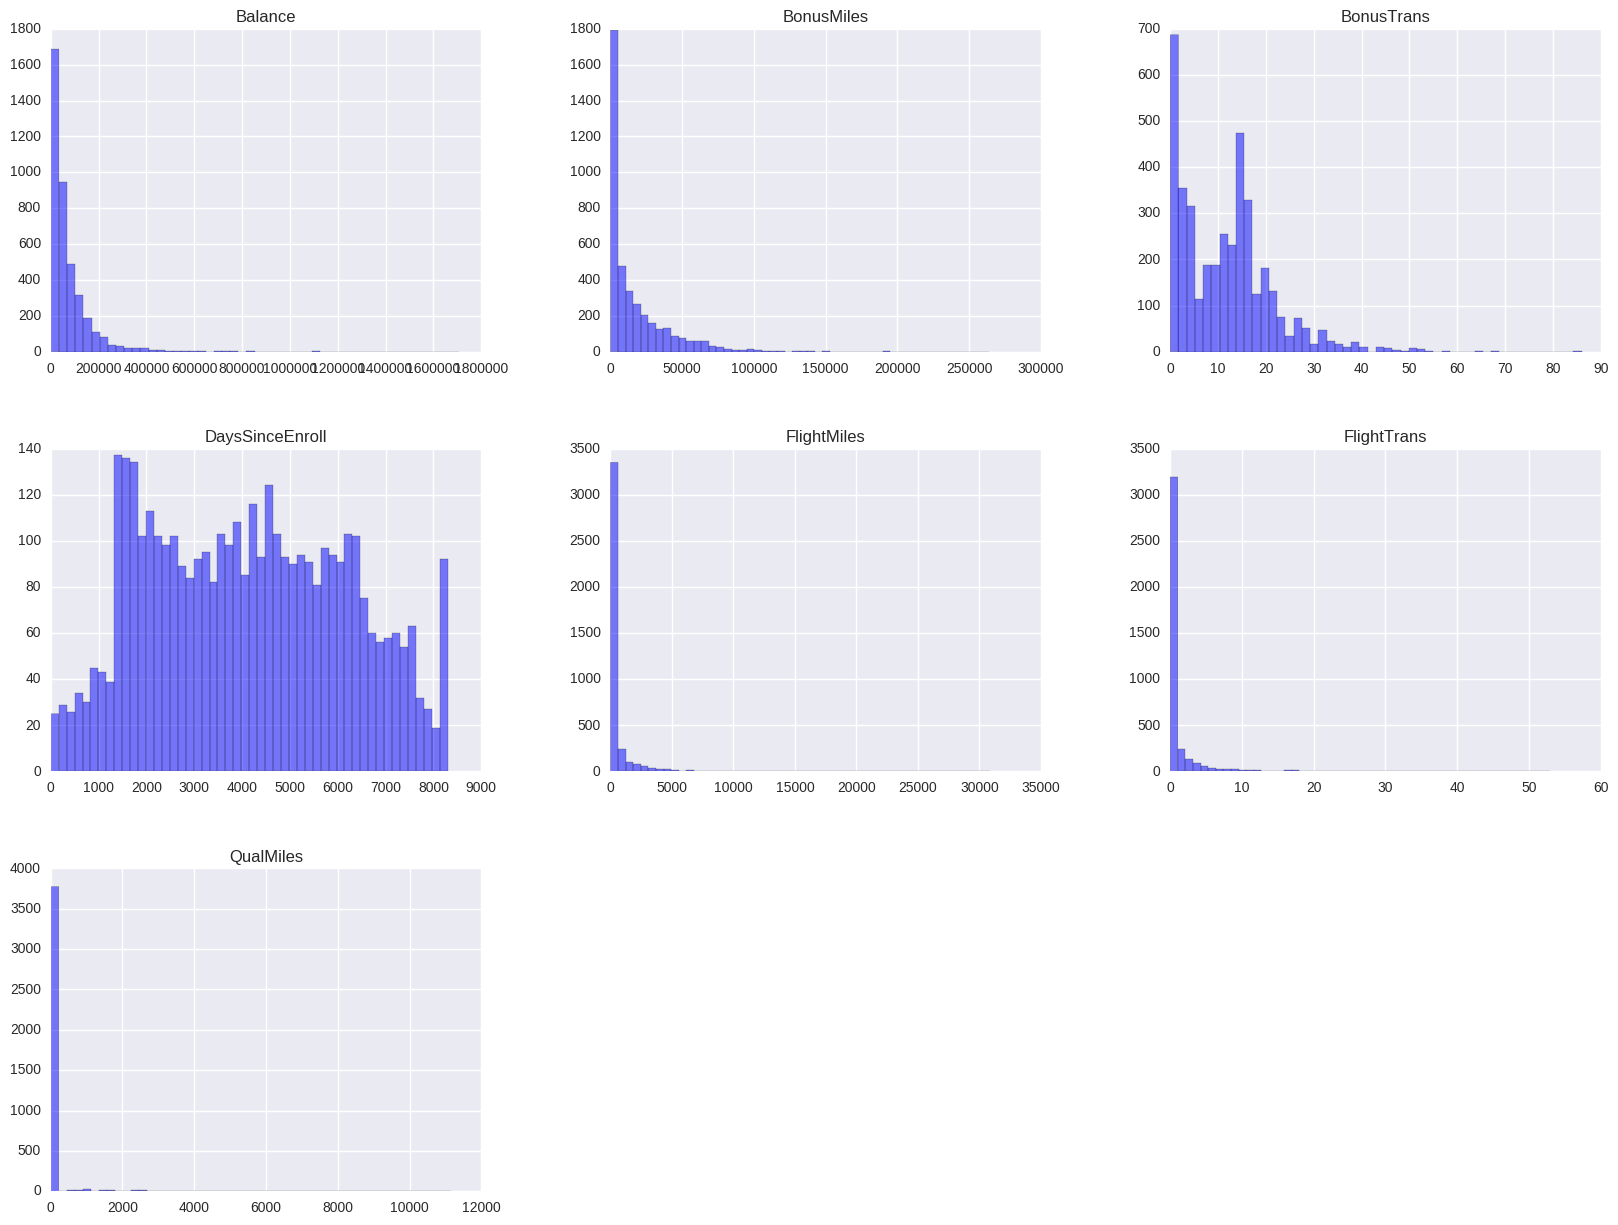

In [21]:
df.hist(color='b', alpha=0.5, bins=50,figsize=(20, 15))


# Normalize data
### If we don't normalize the data, the variables that are on a larger scale will contribute much more to the distance calculation, and thus will dominate the clustering.



In [2]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
print(scaler)
print(scaler.mean_)                                      
print(scaler.scale_)                                       

X_norm=scaler.transform(X)  

df2=pd.DataFrame(data=X_norm) 
print(df2.describe())
print(np.shape(X_norm))
df2.columns=['Balance', 'QualMiles', 'BonusMiles', 'BonusTrans', 'FlightMiles','FlightTrans' ,'DaysSinceEnroll']

NameError: name 'X' is not defined

# Clustering

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
from plotly import tools
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import plotly.graph_objs as go
import matplotlib

In [24]:
# PCA decomposition 
from sklearn.decomposition import PCA

nb_components=2
pca = PCA(n_components=nb_components)
pca.fit(X_norm)
X_pca=pca.transform(X_norm)


## Silouhette analysis showing the number of clusters k

In [27]:
figures = []
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = tools.make_subplots(rows=1, cols=2,
                              print_grid=False,
                              subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox')
        fig.append_trace(filled_area, 1, 1)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg],
                           y=[0, len(X) + (n_clusters + 1) * 10],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =1) )

    fig.append_trace(axis_line, 1, 1)
    
    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.colors.colorConverter.to_rgb(cm.spectral(float(i) / n_clusters))
    colors = 'rgb'+str(colors)
    clusters = go.Scatter(x=X_pca[:, 0], 
                          y=X_pca[:, 1], 
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=colors,
                                     size=4)
                         )
    fig.append_trace(clusters, 1, 2)
    
    # Labeling the clusters
    centers_ = clusterer.cluster_centers_
    centers_pca = pca.transform(centers_)
    # Draw white circles at cluster centers
    centers = go.Scatter(x=centers_pca[:, 0], 
                         y=centers_pca[:, 1],
                         showlegend=False,
                         mode='markers',
                         marker=dict(color='green', size=10,
                                     line=dict(color='black',
                                                             width=1))
                        )

    fig.append_trace(centers, 1, 2)
    
    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)
                              

    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)
    
    figures.append(fig)


For n_clusters = 2 The average silhouette_score is : 0.548290436803
For n_clusters = 3 The average silhouette_score is : 0.312211728661
For n_clusters = 4 The average silhouette_score is : 0.318614970271
For n_clusters = 5 The average silhouette_score is : 0.249000880479
For n_clusters = 6 The average silhouette_score is : 0.258572025301


In [28]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=False)
iplot(figures[0])

In [ ]:
iplot(figures[1])

In [ ]:
iplot(figures[2])

In [ ]:
iplot(figures[3])

## Elbow approach showing the number of clusters k

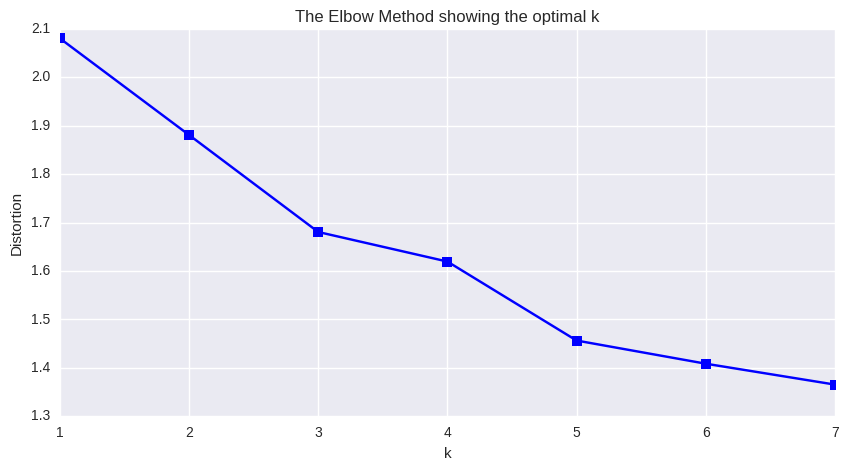

In [29]:
from scipy.spatial.distance import cdist
import seaborn
distortions = []
K = range(1,8)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# Plot the elbow
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bs-')
plt.xlabel('k clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the number of clusters k')
plt.show()

## Hierarchical clustering

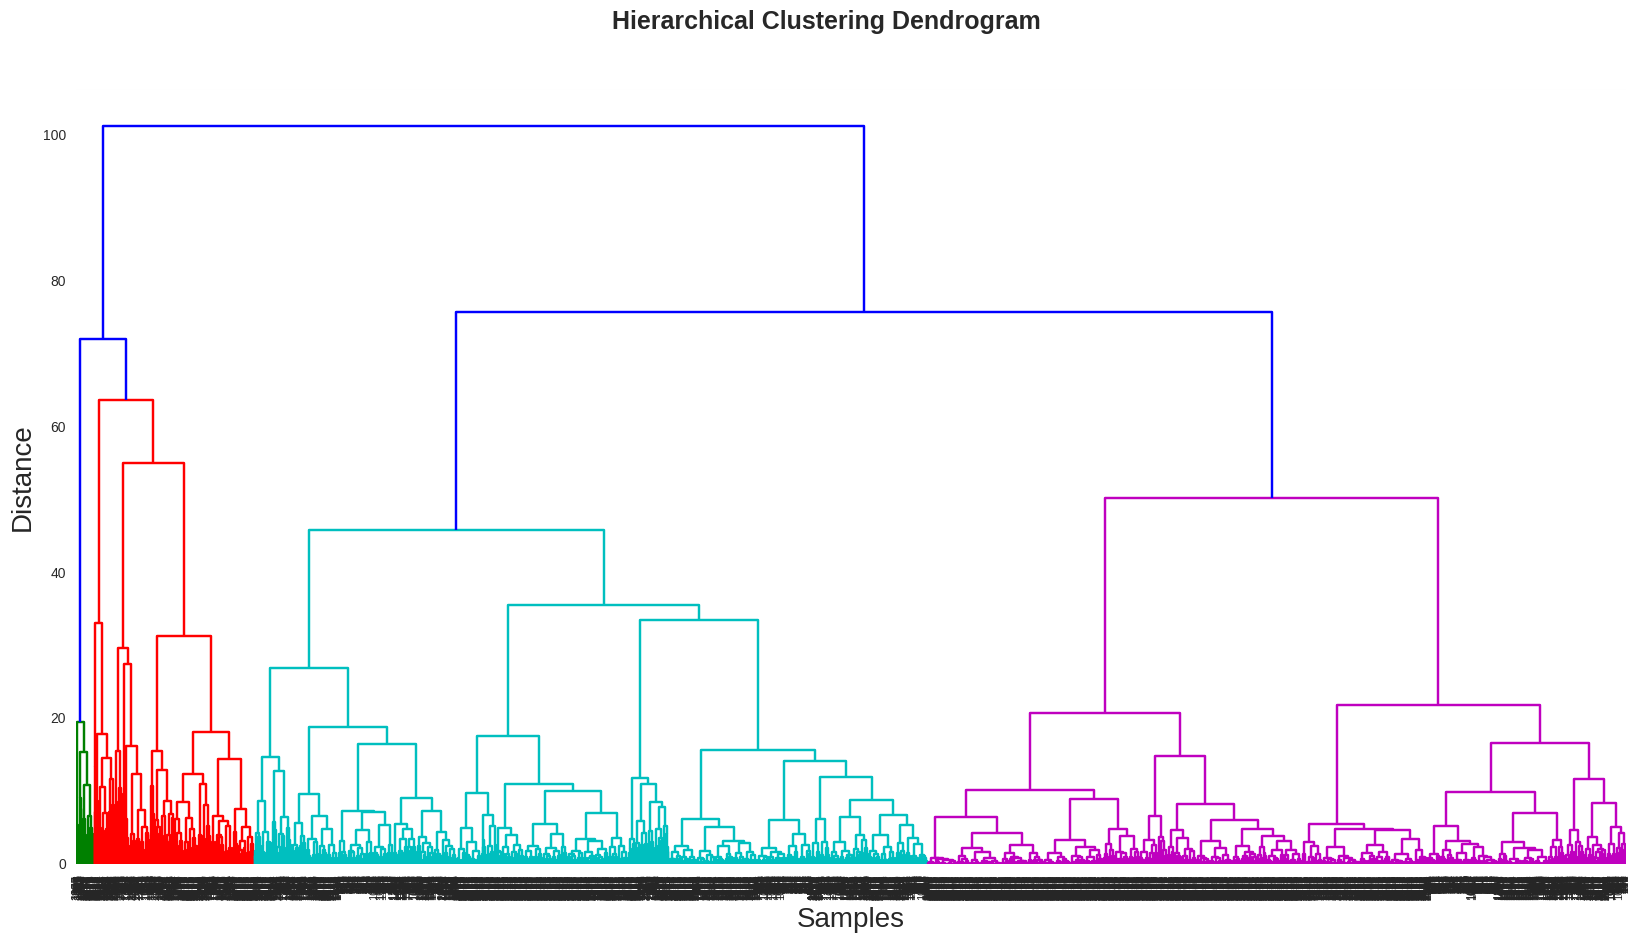

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

data_dist = pdist(X_norm) # computing the distance
data_link = linkage(data_dist,'ward',metric='euclidean') # computing the linkage
plt.figure(figsize=(20, 10))
dendrogram(data_link, leaf_rotation=90.,leaf_font_size=8.)#,labels=df.dtype.names)
plt.xlabel('Samples', fontsize=20)
plt.ylabel('Distance', fontsize=20)
plt.suptitle('Hierarchical Clustering Dendrogram', fontweight='bold', fontsize=18);

## Dimensionality reduction with PCA

#### As far, we used PCA decomposition in 2D for data visualization, but let's study now how many data we lost by reducing the dimensiality

[ 0.37900807  0.19482266  0.14125791  0.12320316  0.09373914  0.05003811]
[1 2 3 4 5 6]


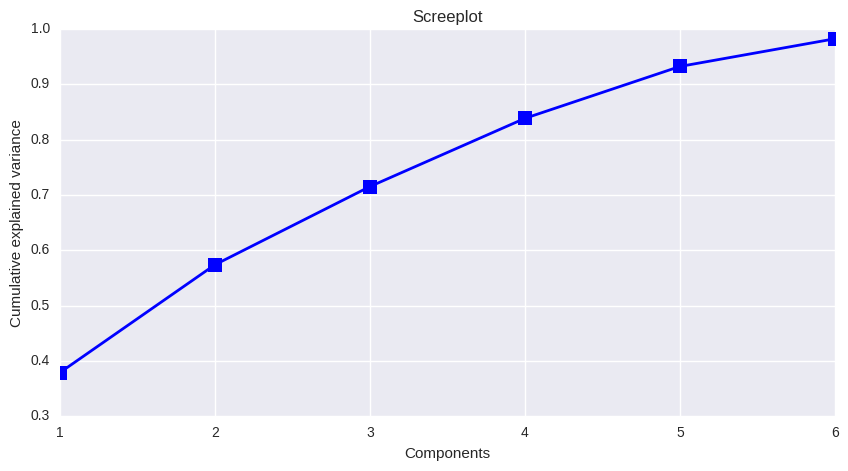

In [31]:
from sklearn.decomposition import PCA
import seaborn


nb_components=6 #
pca = PCA(n_components=nb_components,copy=True, whiten=True)
pca.fit(X_norm)
Z = pca.transform(X_norm)
print(pca.explained_variance_ratio_)

x=np.arange(1,nb_components+1)
print(x)
y=pca.explained_variance_ratio_
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(x,np.cumsum(y),'bs-',linewidth=2.0,markersize=10.0)
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Screeplot')
plt.show()

#### with 2 features we have less than 60% of data;
#### with 3 features we have approximativelly 70% of data;
#### with 4 features we have 85% of data, etc. 

## Hierarchical Clustering visualizaion

{1, 2, 3, 4, 5}


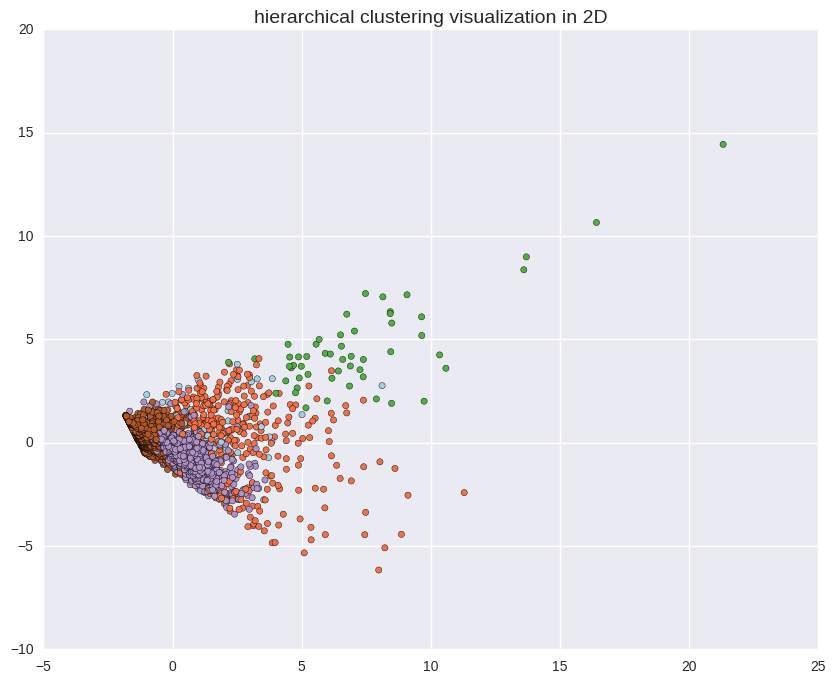

In [51]:
from scipy.cluster.hierarchy import fcluster
max_d = 60 #Threshold
clusters = fcluster(data_link, max_d, criterion='distance')
#clusters
myset = set(clusters)
print(myset)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters,cmap=plt.cm.Paired)  # plot points with cluster dependent colors
plt.title('hierarchical clustering visualization in 2D',fontsize=14)
plt.show()

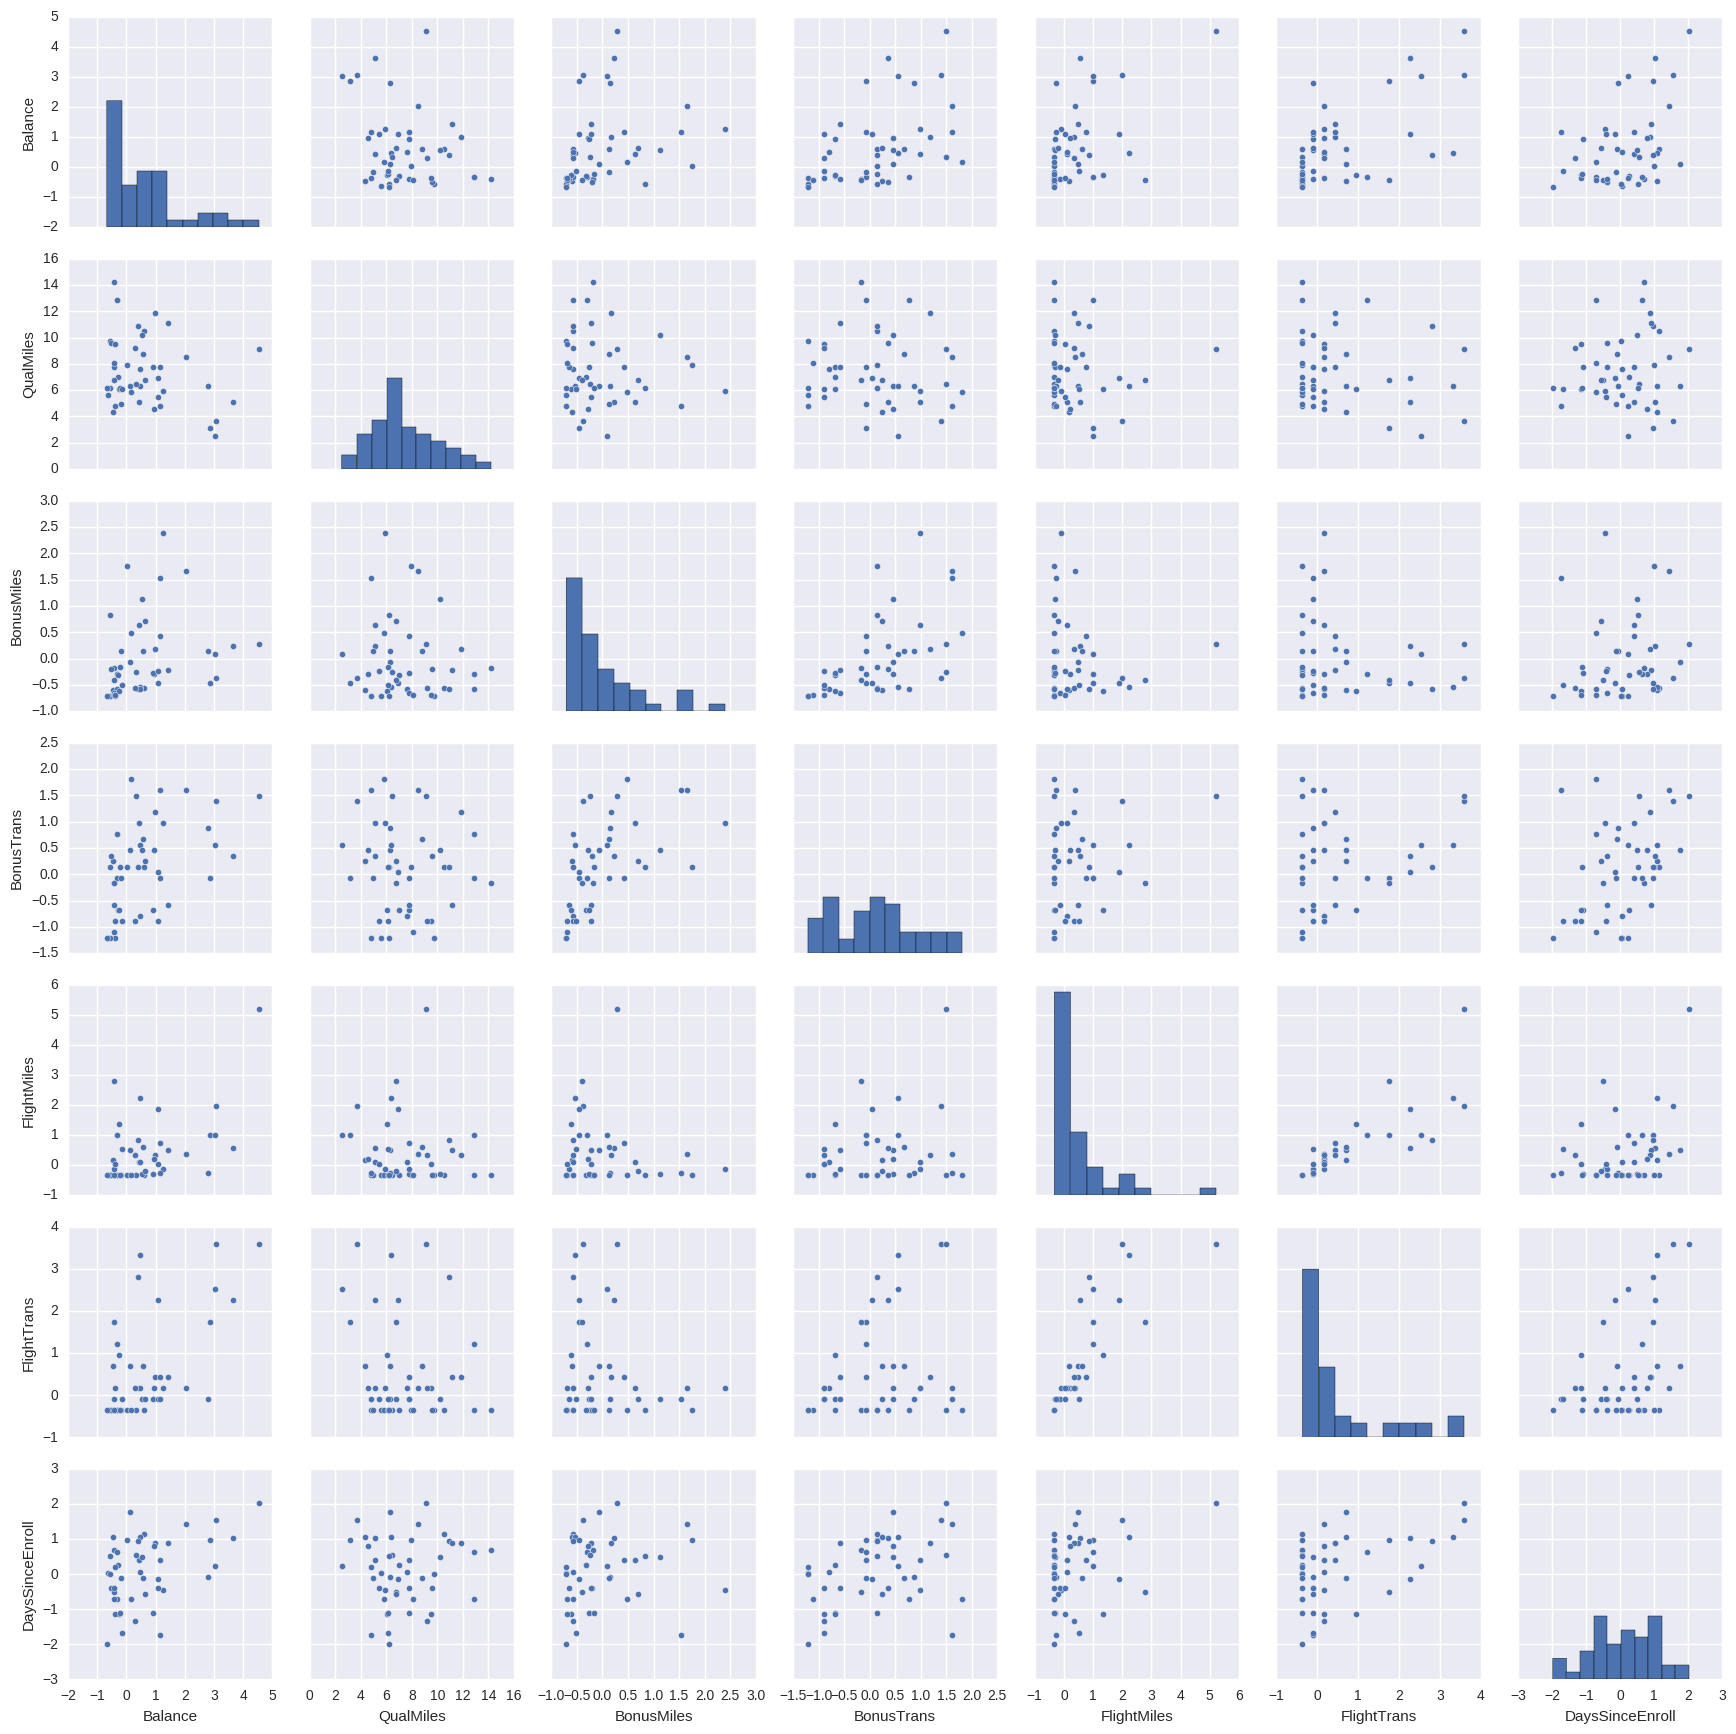

In [35]:
import seaborn as sns
Yc1=X_norm[clusters==1] #1:cluster1, 2:cluster2, etc
dfYc1 = pd.DataFrame(data=Yc1,columns=df.columns)  
sns.pairplot(dfYc1); # see http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot to know more about pairplot

# K-MEANS

In [36]:
from sklearn import metrics
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=20)
kmeans.fit(X_norm)

y_pred = kmeans.fit_predict(X_norm)
#print(y_pred)

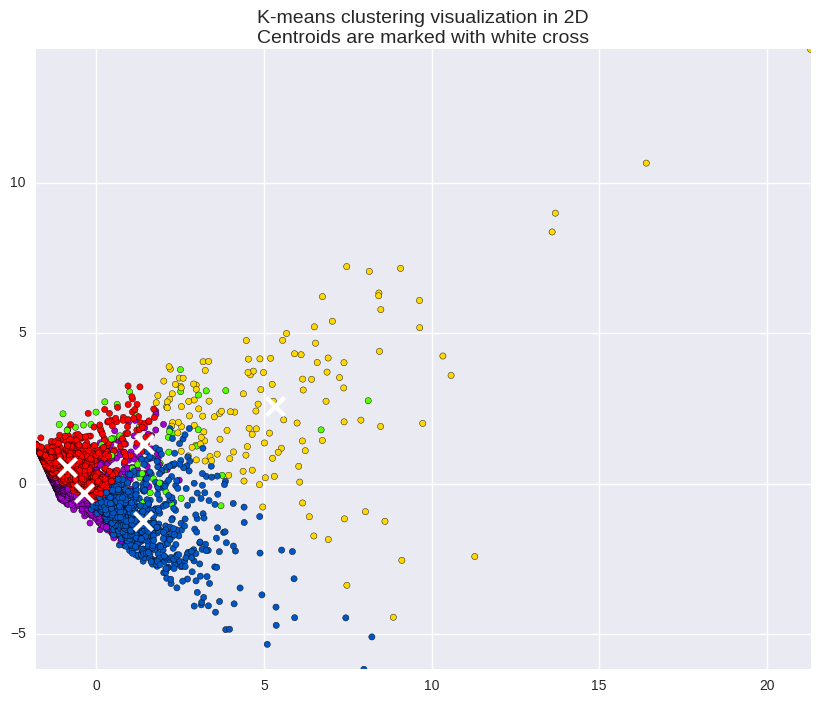

In [38]:
%matplotlib inline
import seaborn

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=y_pred, cmap='prism')
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering visualization in 2D\n'
          'Centroids are marked with white cross',fontsize=14)
x_min=np.min(X_pca[:,0])
x_max=np.max(X_pca[:,0])
y_min=np.min(X_pca[:,1])
y_max=np.max(X_pca[:,1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# k-means Clusters interpretation

In [40]:
clusters_labels = y_pred # data labeled regarding clusters
clusters_centroid = kmeans.cluster_centers_ # clusters centers or centroids
clusters_inertia = kmeans.inertia_  #Sum of squared distances of samples to their closest cluster center

### Data repartition in each cluster

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65a92da5c0>]], dtype=object)

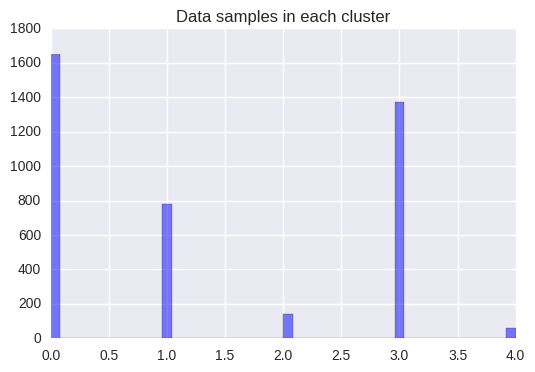

In [49]:
df3=pd.DataFrame(data=clusters_labels,columns=['Data samples in each cluster']) 
df3.hist(color='b', alpha=0.5, bins=50)

Data samples are likely more localised in clusters 0,1 and 3

### Variables average values in each cluster

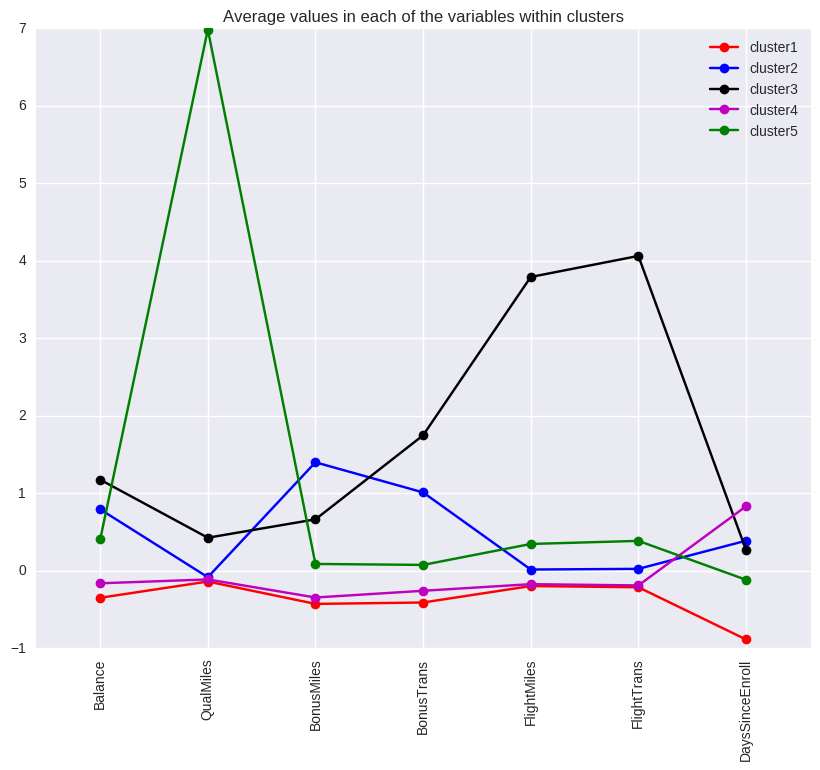

In [50]:
labels=df.columns.values
N=7
ind = np.arange(N)
plt.figure(figsize=(10, 8))
plt.plot((X_norm[clusters_labels==0]).mean(axis=0),'-ro',label='cluster1')
plt.plot((X_norm[clusters_labels==1]).mean(axis=0),'-bo',label='cluster2')
plt.plot((X_norm[clusters_labels==2]).mean(axis=0),'-ko',label='cluster3')
plt.plot((X_norm[clusters_labels==3]).mean(axis=0),'-mo',label='cluster4')
plt.plot((X_norm[clusters_labels==4]).mean(axis=0),'-go',label='cluster5')
plt.xticks(ind,labels, rotation='vertical')
plt.margins(x=0.1)
plt.title('Average values in each of the variables within clusters')
plt.legend()
plt.show()

### TO THINK ABOUT